# Assignment 1 Numpy

In [23]:
#Write a function so that the columns of the output matrix are powers of the input vector.
#The columns of the output matrix are powers of the input vector. The
#order of the powers is determined by the `increasing` boolean argument.
#Specifically, when `increasing` is False, the `i`-th output column is
#the input vector raised element-wise to the power of ``N - i - 1``. Such
#a matrix with a geometric progression in each row is named for Alexandre-
#Theophile Vandermonde.
import numpy as np
x = np.array([1, 2, 3, 5])
N = 4
np.vander(x, N, increasing=False)
np.vander(x, N, increasing=True)

array([[  1,   1,   1,   1],
       [  1,   2,   4,   8],
       [  1,   3,   9,  27],
       [  1,   5,  25, 125]])

In [28]:
def myvander(x, N, increasing):
#    x = asarray(x)
    if x.ndim != 1:
        raise ValueError("x must be a one-dimensional array or sequence.")
    if N is None:
        N = len(x)

    v = np.empty((len(x), N), dtype=(x.dtype, int))
    tmp = v[:, ::-1] if not increasing else v

    if N > 0:
        tmp[:, 0] = 1
    if N > 1:
        tmp[:, 1:] = x[:, None]
        np.multiply.accumulate(tmp[:, 1:], out=tmp[:, 1:], axis=1)

    return v

x = np.array([1, 2, 3, 5])
N = 3
myvander(x, 3, True)


array([[ 1,  1,  1],
       [ 1,  2,  4],
       [ 1,  3,  9],
       [ 1,  5, 25]])

In [21]:
def myvander(x, N, increasing):
    return np.flip(np.column_stack([x**(N-1-i) for i in range(N)]), axis=1)

x = np.array([1, 2, 3, 5])
N = 3
myvander(x, 4, True)
## myvander(x, 4, False) ## not working

## np.all(np.vander(x, N, increasing=True) == np.flip(np.column_stack([x**(N-1-i) for i in range(N)]), axis=1)

array([[  1,   1,   1,   1],
       [  1,   2,   4,   8],
       [  1,   3,   9,  27],
       [  1,   5,  25, 125]], dtype=int32)

In [86]:
#Given a sequence of n values x1, x2, ..., xn and a window size k>0, the k-th moving average of the given sequence is defined as follows:
#The moving average sequence has n-k+1 elements as shown below.
#The moving averages with k=4 of a ten-value sequence (n=10) is shown below

import numpy as np
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

mylist = [1, 2, 3, 4, 5, 6, 7]
N = 4
running_mean(mylist, N)

array([2.5, 3.5, 4.5, 5.5])

In [87]:
mylist = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
N = 4
running_mean(mylist, N)

array([25., 35., 45., 55., 65., 75., 85.])

In [88]:
mylist = [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150]
N = 3
running_mean(mylist, N)

array([  5.        ,   4.66666667,   5.66666667,   6.66666667,
         9.66666667,  28.66666667,  49.33333333,  72.66666667,
        84.        ,  93.33333333, 116.33333333])

# Assignment 1 pandas

1.1) How-to-count-distance-to-the-previous-zero
For each value, count the difference of the distance from the previous zero (or the start of
the Series, whichever is closer) and if there are no previous zeros, print the position

In [9]:
import pandas as pd

df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

#print(df)

df_series = df['X']

s = pd.Series(df_series)
#print(s)
#s = pd.Series([7, 2, 0, 3, 4, 2, 5, 0, 3, 4])

(s.groupby(s.eq(0).cumsum().mask(s.eq(0))).cumcount() + 1).mask(s.eq(0), 0).tolist()

[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]

1.2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a
Series of random numbers.

In [3]:
import pandas as pd
import numpy as np
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dti)), index=dti)
s.head()

2015-01-01    0.405873
2015-01-02    0.742805
2015-01-05    0.931532
2015-01-06    0.345111
2015-01-07    0.078604
Freq: B, dtype: float64

In [94]:
# Find the sum of the values in s for every Wednesday.
s[dti.weekday == 2].sum()

23.455341338272287

In [4]:
# For each calendar month in s, find the mean of values.
#s.resample('M', how='mean')
s.resample('M').mean()

C:\Users\Sanjana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


2015-01-31    0.532924
2015-02-28    0.582051
2015-03-31    0.464715
2015-04-30    0.571050
2015-05-31    0.515694
2015-06-30    0.569856
2015-07-31    0.552888
2015-08-31    0.495866
2015-09-30    0.560280
2015-10-31    0.461020
2015-11-30    0.505604
2015-12-31    0.486563
Freq: M, dtype: float64

In [5]:
#For each group of four consecutive calendar months in s, find the date on which the highest value occurred.
#s.groupby(pd.TimeGrouper('4M')).idxmax()
s.groupby(pd.Grouper(freq='4M')).idxmax()

C:\Users\Sanjana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


2015-01-31   2015-01-28
2015-05-31   2015-03-27
2015-09-30   2015-06-10
2016-01-31   2015-11-02
dtype: datetime64[ns]

2) Read the dataset from the below link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_bn = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
df_bn.shape
df_bn.head()


,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


#1) Delete unnamed columns

In [4]:
df_bn.drop(df_bn.columns[df_bn.columns.str.contains('Unnamed',case = False)], axis = 1, inplace=True)
df_bn.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


#2) Show the distribution of male and female

Text(0, 0.5, 'Male and Female Distro')

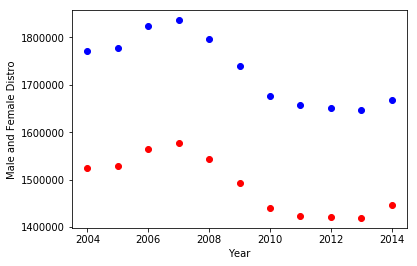

In [5]:
df_bn2 = df_bn.groupby(['Year', 'Gender']).sum()['Count']
years = df_bn.Year.unique()
plt.plot( years , df_bn2[1: :2] , 'bo' )   ## male distro
plt.plot( years , df_bn2[0: :2] , 'ro' )   ## female distro
plt.xlabel ( 'Year' )
plt.ylabel ( 'Male and Female Distro' )

#3) Show the top 5 most preferred names

In [6]:
df_bn.groupby(['Name']).sum()['Count'].sort_values(ascending=False).head()

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
Name: Count, dtype: int64

#4) What is the median name occurrence in the dataset

In [7]:
df_bn['Name'][ df_bn['Name'].value_counts().median() ]   ## 'Alyssa'
#df_bn[df_bn['Name'] == 'Alyssa'].count()[2]

'Alyssa'

#5) Distribution of male and female born count by states

Text(0, 0.5, 'Female Distro by State')

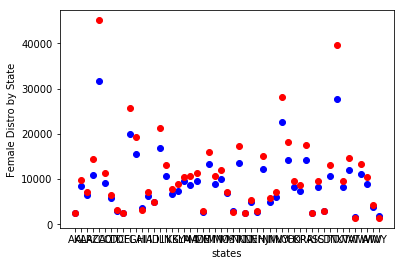

In [8]:
df_bn5 = df_bn.groupby(['State', 'Gender']).count()['Count']
states = df_bn.State.unique()

plt.plot( states , df_bn5[1: :2] , 'bo' )   ## male distro
plt.xlabel ( 'states' )
plt.ylabel ( 'Male Distro by State' )

plt.plot( states , df_bn5[0: :2] , 'ro' )   ## female distro
plt.xlabel ( 'states' )
plt.ylabel ( 'Female Distro by State' )

# TEST1 & REAL WORLD USECASES ON NUMPY & PANDAS

1) Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception handling using try-catch which
gives the output as:

In [66]:
# import module sys to get the type of exception
import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except:
        print("Oops!",sys.exc_info()[0],"occured.")
        print("Next entry.")
        print()
print("The reciprocal of",entry,"is",r)

The entry is a
Oops! <class 'ValueError'> occured.
Next entry.

The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.

The entry is 2
The reciprocal of 2 is 0.5


2) Write a Python program to give exception “Array Out of Bound” if the user wants to access the elements beyond the list
size (use try and except)

In [67]:
import sys
import numpy as np
array1 = np.array([ [1,2,3] , [4,5,6] ])
#type(array1)
#array1.shape, array1.size
try:
#    pos = 1  ## executes else part
    pos = 2  ## executes except part 
    if pos >= len(array1):
        print(array1[pos])
except:
    print("Ooops!", sys.exc_info()[0],"occured")  ## exception “Array Out of Bound”  and 'IndexError' are same ?
else:
    print("succesful execution")
    print(array1[pos])

Ooops! <class 'IndexError'> occured


3) Write a python module script that contains fib2() method to calculate the Fibonacci series till 1000 and save it as fibo.py.
Note : The module created as fibo.py has to be placed in lib folder:
"""""
    For Windows path = C:\Users\Sanjana\Anaconda3\Lib\fibo.py
"""""

In [70]:
def fib2(n):
    fibs = [0, 1]
    for i in range(2, n+1):
        fibs.append(fibs[-1] + fibs[-2])
    return fibs

print(fib2(1000))   

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 12586269025, 20365011074, 32951280099, 53316291173, 86267571272, 139583862445, 225851433717, 365435296162, 591286729879, 956722026041, 1548008755920, 2504730781961, 4052739537881, 6557470319842, 10610209857723, 17167680177565, 27777890035288, 44945570212853, 72723460248141, 117669030460994, 190392490709135, 308061521170129, 498454011879264, 806515533049393, 1304969544928657, 2111485077978050, 3416454622906707, 5527939700884757, 8944394323791464, 14472334024676221, 23416728348467685, 37889062373143906, 61305790721611591, 99194853094755497, 160500643816367088, 259695496911122585, 420196140727489673, 679891637638612258, 110008777

4) Write a python module script that contains ispalindrome() method to calculate the input string as palindrome string or
not and save it as palindrome.py.
''''
    For Windows path = C:\Users\Sanjana\Anaconda3\Lib\palindrome.py
'''''

In [71]:
def isPalindrome(s): 
      
    # Using predefined function to reverse to string print(s) 
    rev = ''.join(reversed(s)) 
  
    # Checking if both string are equal or not  
    if (s == rev): 
        return "Yes, This is Palindrome"
    return "No, This is not Palindrome"

str = "spacecaps"       ## Palindrome
#str = "laxmikanth"     ## not Palindrome

result = isPalindrome(str) 
result

'Yes, This is Palindrome'

#5) Write a program in Python with one class called Cipher. Within the constructor of this class, ask user for a string and store
#it. Use a static variable, key to store a randomly generated integer between 1 and 50 inclusive. Implement two methods,
#encrypt and decrypt within this class. Encrypt generates and prints a cipher text using the user-entered string and the key and
#ecrypt generates decrypted string from ciphertext. The cipher only encrypts alpha and numeric (A-Z, a-z, 0-9). All Symbols,
#such as - , ; %, remain unencrypted. The cipher text can have special characters. Use generator expression to filter out alpha
#and numeric characters of the input string and to generate cipher text. Create an instance of this class, encrypt and decrypt
#back the user entered string.

In [11]:
import numpy as np 
class Cipher:     
    L2I = dict(zip("ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789",range(62)))     
    I2L = dict(zip(range(62),"ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789"))          

    def __init__(self):
        self.Instr=str(input("Enter the input string"))              

    def encrypt(self,key):         
        ciphertext = ""         
        Instr=self.Instr         
        for c in Instr:
            if c.isalnum():
                ciphertext += self.I2L[ (self.L2I[c] + key) ]             
            else:                  
                ciphertext += c         
        return ciphertext          

    def decrypt(self,Enstr,key):         
        plaintext2 = ""         
        for c in Enstr:             
            if c.isalnum():
                plaintext2 += self.I2L[ (self.L2I[c] - key)]             
            else: 
                plaintext2 += c         
        return plaintext2  



In [14]:
k=np.random.randint(1,50,1) 
key=k[0] 
c=Cipher() 
encryptstr=c.encrypt(key) 
decryptstr=c.decrypt(encryptstr,key) 
print("\n Input String is :\t"+c.Instr) 
print("\nEncryption vaue of given string is :\t"+encryptstr)
print("\ndecryption vaue of given string is :\t"+decryptstr)
print(key)

Enter the input stringabc&*

 Input String is :	abc&*

Encryption vaue of given string is :	qrs&*

decryption vaue of given string is :	abc&*
16


6) Get Data from the following link:
http://files.grouplens.org/datasets/movielens/ml-20m.zip
We will be using the following files for this exercise:
ratings.csv : userId,movieId,rating, timestamp
tags.csv : userId,movieId, tag, timestamp
movies.csv : movieId, title, genres

I. Read the dataset using pandas.

In [34]:
import pandas as pd
import numpy as np

ratings = pd.read_csv("C:\\Acadgild docs\\Class room\\project1\\ml-20m\\ratings.csv")
tags = pd.read_csv("C:\\Acadgild docs\\Class room\\project1\\ml-20m\\tags.csv")
movies = pd.read_csv("C:\\Acadgild docs\\Class room\\project1\\ml-20m\\movies.csv")
print(ratings.shape)
print(tags.shape)
print(movies.shape)

(20000263, 4)
(465564, 4)
(27278, 3)


II. Extract the first row from tags and print its type.

In [20]:
tags.head(1)                  

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180


In [21]:
tags.head(1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
userId       1 non-null int64
movieId      1 non-null int64
tag          1 non-null object
timestamp    1 non-null int64
dtypes: int64(3), object(1)
memory usage: 112.0+ bytes


III. Extract row 0, 11, 2000 from tags DataFrame.

In [23]:
tags.iloc[[0, 11, 2000], :]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe().

In [28]:
print(ratings["rating"].count())
print(ratings["rating"].mean())
print(ratings["rating"].std())
print(ratings["rating"].min())
print(ratings["rating"].quantile([0.25,0.5,0.75]))
print(ratings["rating"].max())   

20000263
3.5255285642993797
1.051988919275684
0.5
0.25    3.0
0.50    3.5
0.75    4.0
Name: rating, dtype: float64
5.0


In [27]:
ratings["rating"].describe() 

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

VI. Filter out ratings with rating > 5

In [29]:
ratings[ratings["rating"] > 5]  

,userId,movieId,rating,timestamp


VII. Find how many null values, missing values are present. Deal with them. Print out how many rows have been
modified.

In [35]:
ratings.isnull().sum()     ## no null values
movies.isnull().sum()      ## no null valuesmerge_f1
tags.isnull().sum()        ## column "tag" has 16 null values
tags.describe()            ## 16 rows has null values out of 465564
count_bf = tags["tag"].isnull().sum()  ## less than 1% rows has null values, we can use forward filling method
count_bf

16

In [36]:
tags_null = pd.isnull(tags["tag"])
tags[tags_null]
tags["tag"].fillna("No tag", inplace = True)          ## fill nan with "No tag"
count_af = tags["tag"].isnull().sum()  
count_af

0

In [37]:
count_updated = count_bf - count_af
count_updated

16

VIII. Filter out movies from the movies DataFrame that are of type 'Animation'.

In [38]:
movie_list = movies[movies["genres"].str.contains("Animation") ]
movie_list["title"].unique()

array(['Toy Story (1995)', 'Balto (1995)', 'Pocahontas (1995)', ...,
       'Werner - Volles Rooäää (1999)',
       'Werner - Gekotzt wird später (2003)', 'Brother Bear 2 (2006)'],
      dtype=object)

IX. Find the average rating of movies.

In [39]:
ratings.head()
movieId_avg_ratting = ratings.groupby("movieId")["rating"].agg({"Avg.rating":np.mean})
movieId_avg_ratting.head()

C:\Users\Sanjana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,Avg.rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


X. Perform an inner join of movies and tags based on movieId.

In [40]:
pd.merge(movies, tags, how = "inner", on = "movieId")

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2299,Pixar,1403306852
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3596,animation,1290312028
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3596,family,1290312032
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3596,Tom Hanks,1290312036
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6233,Pixar,1387079572


XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4.

In [42]:
merge_f1 = pd.merge(movies, ratings, how = "inner", on = "movieId")
merge_c4 = merge_f1[ (merge_f1["genres"].str.contains("Comedy") ) & (merge_f1["rating"] > 4) ]
merge_ls = merge_c4.loc[:, ["title"]].drop_duplicates()
merge_ls.head()

,title
1,Toy Story (1995)
71941,Grumpier Old Men (1995)
84683,Waiting to Exhale (1995)
87435,Father of the Bride Part II (1995)
123489,Sabrina (1995)


XII. Split 'genres' into multiple columns.

In [44]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [46]:
slpit_cl = movies['genres'].str.get_dummies('|')
slpit_cl.head(10)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


XIII. Extract year from title e.g. (1995).

In [47]:
movies["title"].head()

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object

In [48]:
new_col = movies["title"].str.split("(", n = 1, expand = True) 
new_col.head()
new_col1 = new_col[1].str.split(")", n = 1, expand = True) 
# new_col1[0].head()
#new_col[0] 
new_col1[0] 

0                                1995
1                                1995
2                                1995
3                                1995
4                                1995
5                                1995
6                                1995
7                                1995
8                                1995
9                                1995
10                               1995
11                               1995
12                               1995
13                               1995
14                               1995
15                               1995
16                               1995
17                               1995
18                               1995
19                               1995
20                               1995
21                               1995
22                               1995
23                               1995
24                               1995
25                               1995
26          

XIV. Select rows based on timestamps later than 2015-02-01.

In [50]:
tags["ts"] = pd.to_datetime(tags["timestamp"], unit='s')
# tags.info()
# tags.head()
tags_date = tags[tags["ts"] > "2015-02-01"]
tags_date

,userId,movieId,tag,timestamp,ts
301,318,260,1970s,1424472169,2015-02-20 22:42:49
302,318,260,fantasy,1424472169,2015-02-20 22:42:49
303,318,260,sci-fi,1424472169,2015-02-20 22:42:49
304,318,115149,Action,1424534310,2015-02-21 15:58:30
305,318,115149,Revenge,1424534283,2015-02-21 15:58:03
306,318,115149,Willem Dafoe,1424534383,2015-02-21 15:59:43
324,342,318,masterplan,1423424898,2015-02-08 19:48:18
326,342,318,prison escape,1423424898,2015-02-08 19:48:18
327,342,318,redemption,1423424898,2015-02-08 19:48:18
589,342,108190,based on a book,1426978115,2015-03-21 22:48:35


XV. Sort the tags DataFrame based on timestamp.

In [51]:
tags_by_ts = tags_date.sort_values("timestamp", ascending=True)
tags_by_ts

,userId,movieId,tag,timestamp,ts
431961,130446,113565,christianity,1422749043,2015-02-01 00:04:03
431964,130446,113565,cult,1422749051,2015-02-01 00:04:11
431965,130446,113565,drama,1422749058,2015-02-01 00:04:18
431966,130446,113565,fake documentary,1422749066,2015-02-01 00:04:26
431967,130446,113565,found footage,1422749072,2015-02-01 00:04:32
431958,130446,113565,born-again,1422749081,2015-02-01 00:04:41
431970,130446,113565,Jonestown,1422749090,2015-02-01 00:04:50
431969,130446,113565,horror,1422749095,2015-02-01 00:04:55
431963,130446,113565,community,1422749110,2015-02-01 00:05:10
431962,130446,113565,closed community,1422749129,2015-02-01 00:05:29


# Assignment - SCIPY & MATPLOTLIB

#1) We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import optimize 

temp_max = np.array([ 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 ])
temp_min = np.array([ 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 ])
months = np.arange(12)

#1. fitting it to the periodic function

In [2]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos( (times + time_offset) * 2 * np.pi / times.max() ))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [30, 20, 0])
res_min, con_min = optimize.curve_fit(yearly_temps, months, temp_min, [25, 10, 0])

days = np.linspace(0, 12, num=365)

#2. plot the fit

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

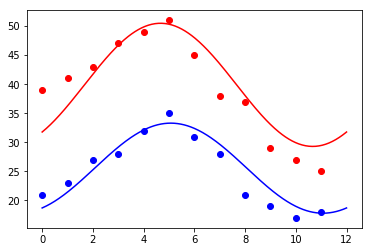

In [3]:
plt.figure()
plt.plot( months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-' )

plt.plot( months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-' )

plt.xlable('Month')
plt.ylable('Temperature ($^\circ$C)')

#2) This assignment is for visualization using matplotlib:
data to use:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#1. Create a pie chart presenting the male/female proportion

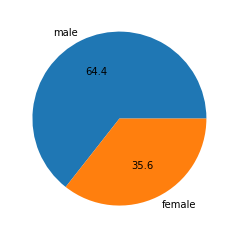

In [5]:
titanic['sex'].value_counts()
labels_sex = ['male', 'female']
plt.pie(titanic['sex'].value_counts(), labels=labels_sex, autopct='%.1f')
plt.show()

#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

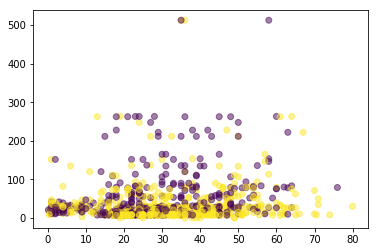

In [6]:
plt.scatter(titanic['age'], titanic['fare'], alpha = 0.5, c=pd.factorize(titanic['sex'])[0])
plt.show()

# Assignment - DATA CLEANING 

Take this monstrosity as the DataFrame to use in the following puzzles:

In [25]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'],
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
From_To         5 non-null object
FlightNumber    3 non-null float64
RecentDelays    5 non-null object
Airline         5 non-null object
dtypes: float64(1), object(3)
memory usage: 240.0+ bytes


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


#1. Some values in the the FlightNumber column are missing. These numbers are
meant to increase by 10 with each row so 10055 and 10075 need to be put in
place. Fill in these missing numbers and make the column an integer column
(instead of a float column).

In [26]:
#df['FlightNumber'] = df['FlightNumber'].interpolate(inplace = True ).astype(int)

df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


#2. The From_To column would be better as two separate columns! Split each
string on the underscore delimiter _ to give a new temporary DataFrame with
the correct values. Assign the correct column names to this temporary
DataFrame.

In [27]:
temp_df = df['From_To'].str.split("_",  expand = True) 
temp_df.columns = ['From', 'To'] 
temp_df

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


#3. Notice how the capitalisation of the city names is all mixed up in this
temporary DataFrame. Standardise the strings so that only the first letter is
uppercase (e.g. "londON" should become "London".)

In [28]:
temp_df['From'] = temp_df['From'].str.title()
temp_df['To'] = temp_df['To'].str.title()

temp_df

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


#4. Delete the From_To column from df and attach the temporary DataFrame
from the previous questions.

In [29]:
df.drop('From_To', axis=1, inplace = True)
df = pd.concat([temp_df, df], axis=1)
df

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045,"[23, 47]",KLM(!)
1,Madrid,Milan,10055,[],<Air France> (12)
2,London,Stockholm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075,[13],12. Air France
4,Brussels,London,10085,"[67, 32]","""Swiss Air"""


#In the RecentDelays column, the values have been entered into the
DataFrame as a list. We would like each first value in its own column, each
second value in its own column, and so on. If there isn't an Nth value, the value
should be NaN.
Expand the Series of lists into a DataFrame named delays, rename the columns
delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df
with delays.

In [30]:
delays = df['RecentDelays'].apply(pd.Series)
delays
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
delays.columns
#df.drop('RecentDelays', axis=1).join(delays)
df = df.drop('RecentDelays', axis=1).join(delays)
df

,From,To,FlightNumber,Airline,delay_1,delay_2,delay_3
0,London,Paris,10045,KLM(!),23.0,47.0,NaN
1,Madrid,Milan,10055,<Air France> (12),NaN,NaN,NaN
2,London,Stockholm,10065,(British Airways. ),24.0,43.0,87.0
3,Budapest,Paris,10075,12. Air France,13.0,NaN,NaN
4,Brussels,London,10085,"""Swiss Air""",67.0,32.0,NaN


# Project II: Data Mangling

In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/jackiekazil/data-wrangling/master/data/chp3/data-text.csv') 
df.head(2)

df1 = pd.read_csv('https://raw.githubusercontent.com/kjam/data-wrangling-pycon/master/data/berlin_weather_oldest.csv') 
df1.head(2)

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,WDFG,PGTM,...,WT09,WT07,WT01,WT06,WT05,WT04,WT16,WT08,WT18,WT03
0,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310101,46,-9999,-9999,-9999,-11,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,GHCND:GME00111445,BERLIN TEMPELHOF GM,19310102,107,-9999,-9999,50,11,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


1. Get the Metadata from the above files

In [11]:
df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4656 entries, 0 to 4655
Data columns (total 12 columns):
Indicator                  4656 non-null object
PUBLISH STATES             4656 non-null object
Year                       4656 non-null int64
WHO region                 4656 non-null object
World Bank income group    4656 non-null object
Country                    4656 non-null object
Sex                        4656 non-null object
Display Value              4656 non-null int64
Numeric                    4656 non-null float64
Low                        0 non-null float64
High                       0 non-null float64
Comments                   0 non-null float64
dtypes: float64(4), int64(2), object(6)
memory usage: 436.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117208 entries, 0 to 117207
Data columns (total 21 columns):
STATION         117208 non-null object
STATION_NAME    117208 non-null object
DATE            117208 non-null int64
PRCP            117208 non-null i

2. Get the row names from the above files.

In [14]:
np.asarray(df.index)

array([   0,    1,    2, ..., 4653, 4654, 4655], dtype=int64)

In [16]:
np.asarray(df1.index)

array([     0,      1,      2, ..., 117205, 117206, 117207], dtype=int64)

3. Change the column name from any of the above file.

In [20]:
df.rename(columns={'Indicator':'Indicator_id'})
df.head(2)

,Indicator,PUBLISH STATES,Year,WHO region,World Bank income group,Country,Sex,Display Value,Numeric,Low,High,Comments
0,Life expectancy at birth (years),Published,1990,Europe,High-income,Andorra,Both sexes,77,77.0,NaN,NaN,NaN
1,Life expectancy at birth (years),Published,2000,Europe,High-income,Andorra,Both sexes,80,80.0,NaN,NaN,NaN


4. Change the column name from any of the above file and store the changes made permanently.

In [22]:
#df = df.rename(columns={'Indicator':'Indicator_id'})
df.rename(columns={'Indicator':'Indicator_id'}, inplace=True)
df.head(2)

,Indicator_id,PUBLISH STATES,Year,WHO region,World Bank income group,Country,Sex,Display Value,Numeric,Low,High,Comments
0,Life expectancy at birth (years),Published,1990,Europe,High-income,Andorra,Both sexes,77,77.0,NaN,NaN,NaN
1,Life expectancy at birth (years),Published,2000,Europe,High-income,Andorra,Both sexes,80,80.0,NaN,NaN,NaN


5. Change the names of multiple columns.

In [23]:
df.rename(columns={'PUBLISH STATES':'Publication Stastus', 'WHO region':'WHO Region'}, inplace=True)
df.head(2)

,Indicator_id,Publication Stastus,Year,WHO Region,World Bank income group,Country,Sex,Display Value,Numeric,Low,High,Comments
0,Life expectancy at birth (years),Published,1990,Europe,High-income,Andorra,Both sexes,77,77.0,NaN,NaN,NaN
1,Life expectancy at birth (years),Published,2000,Europe,High-income,Andorra,Both sexes,80,80.0,NaN,NaN,NaN


6. Arrange values of a particular column in ascending order.

In [24]:
df.sort_values(by='Year', inplace=True)  ## default is ascending=True
df.head()

,Indicator_id,Publication Stastus,Year,WHO Region,World Bank income group,Country,Sex,Display Value,Numeric,Low,High,Comments
0,Life expectancy at birth (years),Published,1990,Europe,High-income,Andorra,Both sexes,77,77.0,NaN,NaN,NaN
1270,Life expectancy at birth (years),Published,1990,Europe,High-income,Germany,Male,72,72.0,NaN,NaN,NaN
3193,Life expectancy at birth (years),Published,1990,Europe,Lower-middle-income,Republic of Moldova,Male,65,65.0,NaN,NaN,NaN
3194,Life expectancy at birth (years),Published,1990,Europe,Lower-middle-income,Republic of Moldova,Both sexes,68,68.0,NaN,NaN,NaN
3197,Life expectancy at age 60 (years),Published,1990,Europe,Lower-middle-income,Republic of Moldova,Male,15,15.0,NaN,NaN,NaN


7. Arrange multiple column values in ascending order.

In [27]:
df.sort_values(by=['Country', 'WHO Region'], inplace=True)
df.head(3)

,Country,Indicator_id,Publication Stastus,Year,WHO Region,World Bank income group,Sex,Display Value,Numeric,Low,High,Comments
1395,Afghanistan,Life expectancy at age 60 (years),Published,1990,Eastern Mediterranean,Low-income,Both sexes,14,14.0,NaN,NaN,NaN
965,Afghanistan,Life expectancy at birth (years),Published,1990,Eastern Mediterranean,Low-income,Male,49,49.0,NaN,NaN,NaN
2959,Afghanistan,Life expectancy at age 60 (years),Published,1990,Eastern Mediterranean,Low-income,Male,13,13.0,NaN,NaN,NaN


8. Make country as the first column of the dataframe.

In [26]:
df = df.iloc[:, [5, 0,1, 2, 3, 4, 6, 7, 8, 9, 10, 11]]  ##country index is 5
df.head()

,Country,Indicator_id,Publication Stastus,Year,WHO Region,World Bank income group,Sex,Display Value,Numeric,Low,High,Comments
1395,Afghanistan,Life expectancy at age 60 (years),Published,1990,Eastern Mediterranean,Low-income,Both sexes,14,14.0,NaN,NaN,NaN
965,Afghanistan,Life expectancy at birth (years),Published,1990,Eastern Mediterranean,Low-income,Male,49,49.0,NaN,NaN,NaN
2959,Afghanistan,Life expectancy at age 60 (years),Published,1990,Eastern Mediterranean,Low-income,Male,13,13.0,NaN,NaN,NaN
1792,Afghanistan,Life expectancy at birth (years),Published,1990,Eastern Mediterranean,Low-income,Female,50,50.0,NaN,NaN,NaN
554,Afghanistan,Life expectancy at birth (years),Published,1990,Eastern Mediterranean,Low-income,Both sexes,49,49.0,NaN,NaN,NaN


9. Get the column array using a variable

In [31]:
np.asarray(df['WHO Region'])

array(['Eastern Mediterranean', 'Eastern Mediterranean',
       'Eastern Mediterranean', ..., 'Africa', 'Africa', 'Africa'],
      dtype=object)

10. Get the subset rows 11, 24, 37

In [29]:
#df.sort_index().iloc[[11, 24, 37], :]  ## both are working
df.loc[[11, 24, 37], :]

,Country,Indicator_id,Publication Stastus,Year,WHO Region,World Bank income group,Sex,Display Value,Numeric,Low,High,Comments
11,Austria,Life expectancy at birth (years),Published,2012,Europe,High-income,Female,83,83.0,NaN,NaN,NaN
24,Brunei Darussalam,Life expectancy at age 60 (years),Published,2012,Western Pacific,High-income,Female,21,21.0,NaN,NaN,NaN
37,Cyprus,Life expectancy at age 60 (years),Published,2012,Europe,High-income,Female,26,26.0,NaN,NaN,NaN


11. Get the subset rows excluding 5, 12, 23, and 56

In [40]:
df_5122356 =  df.iloc[[5, 12, 23, 56], :]
df_5122356

,Country,Indicator_id,Publication Stastus,Year,WHO Region,World Bank income group,Sex,Display Value,Numeric,Low,High,Comments
5,Antigua and Barbuda,Life expectancy at birth (years),Published,2000,Americas,High-income,Male,72,72.0,NaN,NaN,NaN
12,Austria,Life expectancy at age 60 (years),Published,2012,Europe,High-income,Female,25,25.0,NaN,NaN,NaN
23,Brunei Darussalam,Life expectancy at age 60 (years),Published,2000,Western Pacific,High-income,Female,22,22.0,NaN,NaN,NaN
56,Finland,Life expectancy at birth (years),Published,1990,Europe,High-income,Female,79,79.0,NaN,NaN,NaN


In [43]:
df.sort_index(inplace=True)
df.iloc[0:15, :]

,Country,Indicator_id,Publication Stastus,Year,WHO Region,World Bank income group,Sex,Display Value,Numeric,Low,High,Comments
0,Andorra,Life expectancy at birth (years),Published,1990,Europe,High-income,Both sexes,77,77.0,NaN,NaN,NaN
1,Andorra,Life expectancy at birth (years),Published,2000,Europe,High-income,Both sexes,80,80.0,NaN,NaN,NaN
2,Andorra,Life expectancy at age 60 (years),Published,2012,Europe,High-income,Female,28,28.0,NaN,NaN,NaN
3,Andorra,Life expectancy at age 60 (years),Published,2000,Europe,High-income,Both sexes,23,23.0,NaN,NaN,NaN
4,United Arab Emirates,Life expectancy at birth (years),Published,2012,Eastern Mediterranean,High-income,Female,78,78.0,NaN,NaN,NaN
5,Antigua and Barbuda,Life expectancy at birth (years),Published,2000,Americas,High-income,Male,72,72.0,NaN,NaN,NaN
6,Antigua and Barbuda,Life expectancy at age 60 (years),Published,1990,Americas,High-income,Male,17,17.0,NaN,NaN,NaN
7,Antigua and Barbuda,Life expectancy at age 60 (years),Published,2012,Americas,High-income,Both sexes,22,22.0,NaN,NaN,NaN
8,Australia,Life expectancy at birth (years),Published,2012,Western Pacific,High-income,Male,81,81.0,NaN,NaN,NaN
9,Australia,Life expectancy at birth (years),Published,2000,Western Pacific,High-income,Both sexes,80,80.0,NaN,NaN,NaN


In [45]:
df.drop(df.index[[5, 12, 23, 56]], inplace=True)  ## for perminent drop use inplace=True
## drop_ind = df.drop(df.loc[[5, 12, 23, 56]]) 
df.iloc[0:15, :]

,Country,Indicator_id,Publication Stastus,Year,WHO Region,World Bank income group,Sex,Display Value,Numeric,Low,High,Comments
0,Andorra,Life expectancy at birth (years),Published,1990,Europe,High-income,Both sexes,77,77.0,NaN,NaN,NaN
1,Andorra,Life expectancy at birth (years),Published,2000,Europe,High-income,Both sexes,80,80.0,NaN,NaN,NaN
2,Andorra,Life expectancy at age 60 (years),Published,2012,Europe,High-income,Female,28,28.0,NaN,NaN,NaN
3,Andorra,Life expectancy at age 60 (years),Published,2000,Europe,High-income,Both sexes,23,23.0,NaN,NaN,NaN
4,United Arab Emirates,Life expectancy at birth (years),Published,2012,Eastern Mediterranean,High-income,Female,78,78.0,NaN,NaN,NaN
6,Antigua and Barbuda,Life expectancy at age 60 (years),Published,1990,Americas,High-income,Male,17,17.0,NaN,NaN,NaN
7,Antigua and Barbuda,Life expectancy at age 60 (years),Published,2012,Americas,High-income,Both sexes,22,22.0,NaN,NaN,NaN
8,Australia,Life expectancy at birth (years),Published,2012,Western Pacific,High-income,Male,81,81.0,NaN,NaN,NaN
9,Australia,Life expectancy at birth (years),Published,2000,Western Pacific,High-income,Both sexes,80,80.0,NaN,NaN,NaN
10,Australia,Life expectancy at birth (years),Published,2012,Western Pacific,High-income,Both sexes,83,83.0,NaN,NaN,NaN


In [47]:
users = pd.read_csv('https://raw.githubusercontent.com/ben519/DataWrangling/master/Data/users.csv')
sessions = pd.read_csv('https://raw.githubusercontent.com/ben519/DataWrangling/master/Data/sessions.csv')
products = pd.read_csv('https://raw.githubusercontent.com/ben519/DataWrangling/master/Data/products.csv')
transactions = pd.read_csv('https://raw.githubusercontent.com/ben519/DataWrangling/master/Data/transactions.csv') 

users.head() 

,UserID,User,Gender,Registered,Cancelled
0,1,Charles,male,2012-12-21,NaN
1,2,Pedro,male,2010-08-01,2010-08-08
2,3,Caroline,female,2012-10-23,2016-06-07
3,4,Brielle,female,2013-07-17,NaN
4,5,Benjamin,male,2010-11-25,NaN


In [48]:
sessions.head() 

,SessionID,SessionDate,UserID
0,1,2010-01-05,2
1,2,2010-08-01,2
2,3,2010-11-25,2
3,4,2011-09-21,5
4,5,2011-10-19,4


In [49]:
products.head()

,ProductID,Product,Price
0,1,A,14.16
1,2,B,33.04
2,3,C,10.65
3,4,D,10.02
4,5,E,29.66


In [50]:
transactions.head()

,TransactionID,TransactionDate,UserID,ProductID,Quantity
0,1,2010-08-21,7.0,2,1
1,2,2011-05-26,3.0,4,1
2,3,2011-06-16,3.0,3,1
3,4,2012-08-26,1.0,2,3
4,5,2013-06-06,2.0,4,1


12. Join users to transactions, keeping all rows from transactions and only matching rows from users (left join)

In [51]:
a_12 = pd.merge(transactions, users, how = "left", on = "UserID")
a_12

,TransactionID,TransactionDate,UserID,ProductID,Quantity,User,Gender,Registered,Cancelled
0,1,2010-08-21,7.0,2,1,NaN,NaN,NaN,NaN
1,2,2011-05-26,3.0,4,1,Caroline,female,2012-10-23,2016-06-07
2,3,2011-06-16,3.0,3,1,Caroline,female,2012-10-23,2016-06-07
3,4,2012-08-26,1.0,2,3,Charles,male,2012-12-21,NaN
4,5,2013-06-06,2.0,4,1,Pedro,male,2010-08-01,2010-08-08
5,6,2013-12-23,2.0,5,6,Pedro,male,2010-08-01,2010-08-08
6,7,2013-12-30,3.0,4,1,Caroline,female,2012-10-23,2016-06-07
7,8,2014-04-24,NaN,2,3,NaN,NaN,NaN,NaN
8,9,2015-04-24,7.0,4,3,NaN,NaN,NaN,NaN
9,10,2016-05-08,3.0,4,4,Caroline,female,2012-10-23,2016-06-07


13. Which transactions have a UserID not in users?

In [52]:
transactions[~transactions['UserID'].isin(users['UserID'])]

,TransactionID,TransactionDate,UserID,ProductID,Quantity
0,1,2010-08-21,7.0,2,1
7,8,2014-04-24,NaN,2,3
8,9,2015-04-24,7.0,4,3


14. Join users to transactions, keeping only rows from transactions and users that match via UserID (inner join)

In [53]:
a_14 = pd.merge(transactions, users, how = "inner", on = "UserID")
a_14

,TransactionID,TransactionDate,UserID,ProductID,Quantity,User,Gender,Registered,Cancelled
0,2,2011-05-26,3.0,4,1,Caroline,female,2012-10-23,2016-06-07
1,3,2011-06-16,3.0,3,1,Caroline,female,2012-10-23,2016-06-07
2,7,2013-12-30,3.0,4,1,Caroline,female,2012-10-23,2016-06-07
3,10,2016-05-08,3.0,4,4,Caroline,female,2012-10-23,2016-06-07
4,4,2012-08-26,1.0,2,3,Charles,male,2012-12-21,NaN
5,5,2013-06-06,2.0,4,1,Pedro,male,2010-08-01,2010-08-08
6,6,2013-12-23,2.0,5,6,Pedro,male,2010-08-01,2010-08-08


15. Join users to transactions, displaying all matching rows AND all non-matching rows(full outer join)

In [54]:
a_15 = pd.merge(transactions, users, how = "outer", on = "UserID")
a_15

,TransactionID,TransactionDate,UserID,ProductID,Quantity,User,Gender,Registered,Cancelled
0,1.0,2010-08-21,7.0,2.0,1.0,NaN,NaN,NaN,NaN
1,9.0,2015-04-24,7.0,4.0,3.0,NaN,NaN,NaN,NaN
2,2.0,2011-05-26,3.0,4.0,1.0,Caroline,female,2012-10-23,2016-06-07
3,3.0,2011-06-16,3.0,3.0,1.0,Caroline,female,2012-10-23,2016-06-07
4,7.0,2013-12-30,3.0,4.0,1.0,Caroline,female,2012-10-23,2016-06-07
5,10.0,2016-05-08,3.0,4.0,4.0,Caroline,female,2012-10-23,2016-06-07
6,4.0,2012-08-26,1.0,2.0,3.0,Charles,male,2012-12-21,NaN
7,5.0,2013-06-06,2.0,4.0,1.0,Pedro,male,2010-08-01,2010-08-08
8,6.0,2013-12-23,2.0,5.0,6.0,Pedro,male,2010-08-01,2010-08-08
9,8.0,2014-04-24,NaN,2.0,3.0,NaN,NaN,NaN,NaN


16. Determine which sessions occurred on the same day each user registered

In [55]:
pd.merge(left=users, right=sessions, how='inner', left_on=['UserID', 'Registered'], right_on=['UserID', 'SessionDate'])

,UserID,User,Gender,Registered,Cancelled,SessionID,SessionDate
0,2,Pedro,male,2010-08-01,2010-08-08,2,2010-08-01
1,4,Brielle,female,2013-07-17,NaN,9,2013-07-17


17. Build a dataset with every possible (UserID, ProductID) pair (cross join)

In [56]:
a_temp1 = pd.DataFrame({'key': np.repeat(1, users.shape[0]), 'UserID': users.UserID})
a_temp2 = pd.DataFrame({'key': np.repeat(1, products.shape[0]), 'ProductID': products.ProductID})
user_product = pd.merge(a_temp1, a_temp2, on='key')[['UserID', 'ProductID']]
user_product

,UserID,ProductID
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
5,2,1
6,2,2
7,2,3
8,2,4
9,2,5


In [ ]:
18. Determine how much quantity of each product was purchased by each user

In [57]:
a_18 = pd.merge(user_product, transactions, how='left', on=['UserID', 'ProductID']).groupby(['UserID', 'ProductID']).apply(lambda x: pd.Series(dict(Quantity=x.Quantity.sum())) ).reset_index().fillna(0)
a_18

,UserID,ProductID,Quantity
0,1,1,0.0
1,1,2,3.0
2,1,3,0.0
3,1,4,0.0
4,1,5,0.0
5,2,1,0.0
6,2,2,0.0
7,2,3,0.0
8,2,4,1.0
9,2,5,6.0


19. For each user, get each possible pair of pair transactions (TransactionID1,TransacationID2) i.e self join

In [58]:
a_19 = pd.merge(transactions, transactions, on='UserID')
a_19

,TransactionID_x,TransactionDate_x,UserID,ProductID_x,Quantity_x,TransactionID_y,TransactionDate_y,ProductID_y,Quantity_y
0,1,2010-08-21,7.0,2,1,1,2010-08-21,2,1
1,1,2010-08-21,7.0,2,1,9,2015-04-24,4,3
2,9,2015-04-24,7.0,4,3,1,2010-08-21,2,1
3,9,2015-04-24,7.0,4,3,9,2015-04-24,4,3
4,2,2011-05-26,3.0,4,1,2,2011-05-26,4,1
5,2,2011-05-26,3.0,4,1,3,2011-06-16,3,1
6,2,2011-05-26,3.0,4,1,7,2013-12-30,4,1
7,2,2011-05-26,3.0,4,1,10,2016-05-08,4,4
8,3,2011-06-16,3.0,3,1,2,2011-05-26,4,1
9,3,2011-06-16,3.0,3,1,3,2011-06-16,3,1


20. Join each user to his/her first occuring transaction in the transactions table

In [60]:
data = pd.merge(users, transactions.groupby('UserID').first().reset_index(), how='left', on='UserID')
data

,UserID,User,Gender,Registered,Cancelled,TransactionID,TransactionDate,ProductID,Quantity
0,1,Charles,male,2012-12-21,NaN,4.0,2012-08-26,2.0,3.0
1,2,Pedro,male,2010-08-01,2010-08-08,5.0,2013-06-06,4.0,1.0
2,3,Caroline,female,2012-10-23,2016-06-07,2.0,2011-05-26,4.0,1.0
3,4,Brielle,female,2013-07-17,NaN,NaN,NaN,NaN,NaN
4,5,Benjamin,male,2010-11-25,NaN,NaN,NaN,NaN,NaN


21. Test to see if we can drop columns

In [61]:
my_columns = list(data.columns) 
my_columns    

['UserID',
 'User',
 'Gender',
 'Registered',
 'Cancelled',
 'TransactionID',
 'TransactionDate',
 'ProductID',
 'Quantity']

In [62]:
list(data.dropna(thresh=int(data.shape[0] * .9), axis=1).columns)  ## column droped that less than 4 nan, populated remaining columns

['UserID', 'User', 'Gender', 'Registered']

In [63]:
missing_info = list(data.columns[data.isnull().any()])  # list of columns has nan
missing_info

['Cancelled', 'TransactionID', 'TransactionDate', 'ProductID', 'Quantity']

In [64]:
for col in missing_info:
    num_missing = data[data[col].isnull() == True].shape[0] 
    print('number missing for column {}: {}'.format(col, num_missing))

number missing for column Cancelled: 3
number missing for column TransactionID: 2
number missing for column TransactionDate: 2
number missing for column ProductID: 2
number missing for column Quantity: 2


In [65]:
for col in missing_info:
    percent_missing = data[data[col].isnull() == True].shape[0] / data.shape[0] 
    print('percent missing for column {}: {}'.format( col, percent_missing))

percent missing for column Cancelled: 0.6
percent missing for column TransactionID: 0.4
percent missing for column TransactionDate: 0.4
percent missing for column ProductID: 0.4
percent missing for column Quantity: 0.4
